# Investigate the APS data

This file is for investigating the APS data stored in HDF5 format.

Finn O'Shea  
September 10, 2021

In [2]:
# dumb overhead for using external files while they are being edited
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

from aps_data_handler import APSDataCollector,APSDataHandler

datapointer = '/sdf/group/ml/datasets/bes_anomaly_data/PSTrips-2020-01-13.h5'

#### First, let's look at which magnets went "bad."

In [2]:
badmags = []

with h5py.File(datapointer,'r') as t:
    for run in t.values(): # enumerate the runs
        for scenario in run.values(): # enumerate the scenarios
            badsec = scenario.attrs['badSector']
            badmag = scenario.attrs['badMagnet']
            if badsec != 'none':
                bm = "{:s}:{:s}".format(badsec,badmag)
                badmags.append(bm)
nbm = len(set(badmags))
print('There were {:d} unique bad magnets in {:d} scenarios with a bad magnet.'.format(nbm,len(badmags)))
print(badmags)

There were 41 unique bad magnets in 52 scenarios with a bad magnet.
['s16b:s2', 's39b:q1', 's6a:s1', 's3a:s2', 's5a:v3', 's33a:q3', 's13a:q4', 's17a:q4', 's10b:v1', 's10b:v1', 's6b:q3', 's3a:v3', 's3a:v3', 's8b:q5', 's20b:q1', 's40b:v4', 's35a:q4', 's15a:q5', 's40b:v4', 's2a:q2', 's10b:q2', 's4a:s2', 's40b:v4', 's40b:v4', 's40b:v4', 's40b:v4', 's40b:v4', 's19b:q3', 's2a:v3', 's25a:h3', 's8a:q4', 's2a:v3', 's30b:q5', 's1b:h3', 's23a:q3', 's23a:s1', 's21b:v1', 's40b:h3', 's19b:q3', 's29b:v1', 's17b:q4', 's17a:q5', 's33a:q2', 's13b:q5', 's5b:v2', 's5b:v2', 's19a:q2', 's19b:s3', 's22a:s1', 's33b:q4', 's13a:v3', 's19a:s1']


In [3]:
aps = APSDataHandler(datapointer)

In [4]:
with h5py.File(datapointer,'r') as t:
    output = aps.getMagnetFeatures(t,'Run2019-3','referenceData','S16B','S2')
output.keys()

dict_keys(['caerrors', 'captempai', 'currentai', 'dacai', 'igbttempai', 'magtempai', 'outvoltageai', 'peakabsdevai', 'day', 'second'])

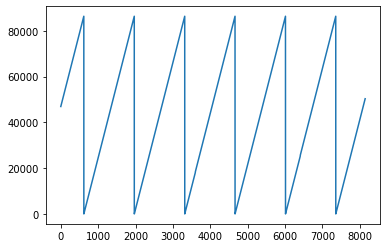

In [98]:
import matplotlib.pyplot as plt
plt.plot(output['second']['series'])

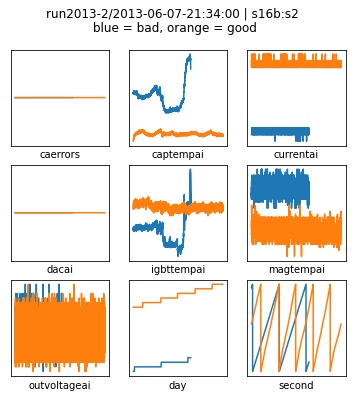

In [22]:
aps.plotBadVersusGood('run2013-2/2013-06-07-21:34:00')

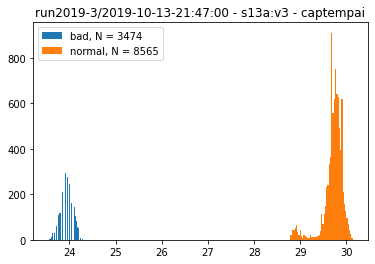

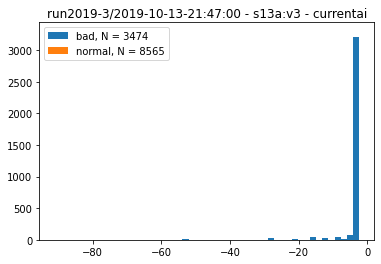

In [21]:
aps.histBadAndNormal('run2019-3/2019-10-13-21:47:00','captempai')
aps.histBadAndNormal('run2019-3/2019-10-13-21:47:00','currentai')

In [11]:
aps.printScenarios()

+ run2013-2
  --> run2013-2/2013-06-07-21:34:00
  --> run2013-2/2013-06-27-15:14:00
  --> run2013-2/2013-07-03-05:25:00
  --> run2013-2/referencedata
+ run2014-1
  --> run2014-1/2014-02-12-22:46:00
  --> run2014-1/2014-02-13-13:46:00
  --> run2014-1/2014-02-27-02:35:00
  --> run2014-1/referencedata
+ run2014-2
  --> run2014-2/2014-06-12-16:27:00
  --> run2014-2/2014-07-19-16:54:00
  --> run2014-2/2014-08-11-10:19:00
  --> run2014-2/2014-08-11-14:20:00
  --> run2014-2/referencedata
+ run2014-3
  --> run2014-3/2014-10-07-04:58:00
  --> run2014-3/referencedata
+ run2015-1
  --> run2015-1/2015-02-21-10:47:00
  --> run2015-1/2015-02-27-23:36:00
  --> run2015-1/2015-04-12-21:16:00
  --> run2015-1/referencedata
+ run2015-2
  --> run2015-2/2015-07-09-23:59:00
  --> run2015-2/referencedata
+ run2015-3
  --> run2015-3/2015-10-28-12:52:00
  --> run2015-3/referencedata
+ run2016-1
  --> run2016-1/2016-03-07-16:31:00
  --> run2016-1/2016-04-08-19:02:00
  --> run2016-1/referencedata
+ run2016-2
  --